In [17]:
import numpy as np

# Comprehensive Exploratory Data Analysis Guide

Welcome to this educational guide on **Exploratory Data Analysis (EDA)**! This notebook will take you through the complete process of analyzing data to understand patterns, relationships, and characteristics that can help in making data-driven decisions.

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Data Import and Initial Exploration** - Loading data and understanding its structure
2. **Individual Feature Analysis** - Visualizing patterns in continuous and categorical variables
3. **Descriptive Statistical Analysis** - Computing summary statistics and distributions
4. **Grouping and Pivot Tables** - Analyzing data by categories and creating summary tables
5. **Correlation Analysis** - Understanding relationships between variables using Pearson correlation
6. **Advanced Visualization Techniques** - Creating meaningful plots for data insights

## 📊 What We'll Analyze

We'll work with automotive data to understand **what characteristics have the most impact on car prices**. This practical example will demonstrate real-world data analysis techniques that you can apply to any dataset.

---

Let's begin our exploratory data analysis journey!

In [18]:
# Essential Library Imports for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configure plotting settings
%matplotlib inline
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("📊 Ready for exploratory data analysis!")

✅ All libraries imported successfully!
📊 Ready for exploratory data analysis!


## 1. Data Import and Initial Exploration

The first step in any data analysis is to load and examine our dataset. Understanding the structure, data types, and basic characteristics of our data is crucial for effective analysis.

In [19]:
# Load the automotive dataset
# Using local CSV file from our data analysis directory
df = pd.read_csv('clean_df.csv', index_col=0)

print("🎉 Dataset loaded successfully!")
print(f"📊 Dataset dimensions: {df.shape[0]} rows × {df.shape[1]} columns")

# Display first few rows to understand the data structure
print("\n🔍 First 5 rows of our dataset:")
df.head()

🎉 Dataset loaded successfully!
📊 Dataset dimensions: 201 rows × 30 columns

🔍 First 5 rows of our dataset:


,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


In [20]:
# Examine data types and basic information
print("📋 DATA TYPES AND STRUCTURE")
print("=" * 50)

# Display data types for each column
print("🏷️ Data types for each column:")
print(df.dtypes)

print(f"\n📊 Dataset Info:")
print(f"• Total columns: {len(df.columns)}")
print(f"• Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"• Missing values: {df.isnull().sum().sum()}")

# Quick check for numerical vs categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

print(f"\n🔢 Numerical columns ({len(numerical_cols)}): {numerical_cols[:5]}...")  # Show first 5
print(f"🏷️ Categorical columns ({len(categorical_cols)}): {categorical_cols[:5]}...")  # Show first 5

📋 DATA TYPES AND STRUCTURE
🏷️ Data types for each column:
symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city-L/100km         float64
horsepower-binned     object
fuel-type-diesel        bool
fuel-type-gas           bool
aspiration-std          bool
aspiration-turbo        bool
dtype: object

📊 Dataset Info:
• Total columns: 30
• Memory usage: 137.4

## 2. Analyzing Individual Feature Patterns using Visualization

Understanding individual variables is crucial before analyzing relationships. Different types of variables require different visualization approaches:

- **Continuous numerical variables**: Best visualized with scatter plots and regression lines
- **Categorical variables**: Best visualized with box plots to show distributions across categories

### 2.1 Continuous Numerical Variables

For continuous variables, we'll use regression plots to visualize the relationship with our target variable (price) and assess the strength of linear relationships.

📈 CONTINUOUS VARIABLE ANALYSIS
Analyzing: ['engine-size', 'horsepower', 'curb-weight']


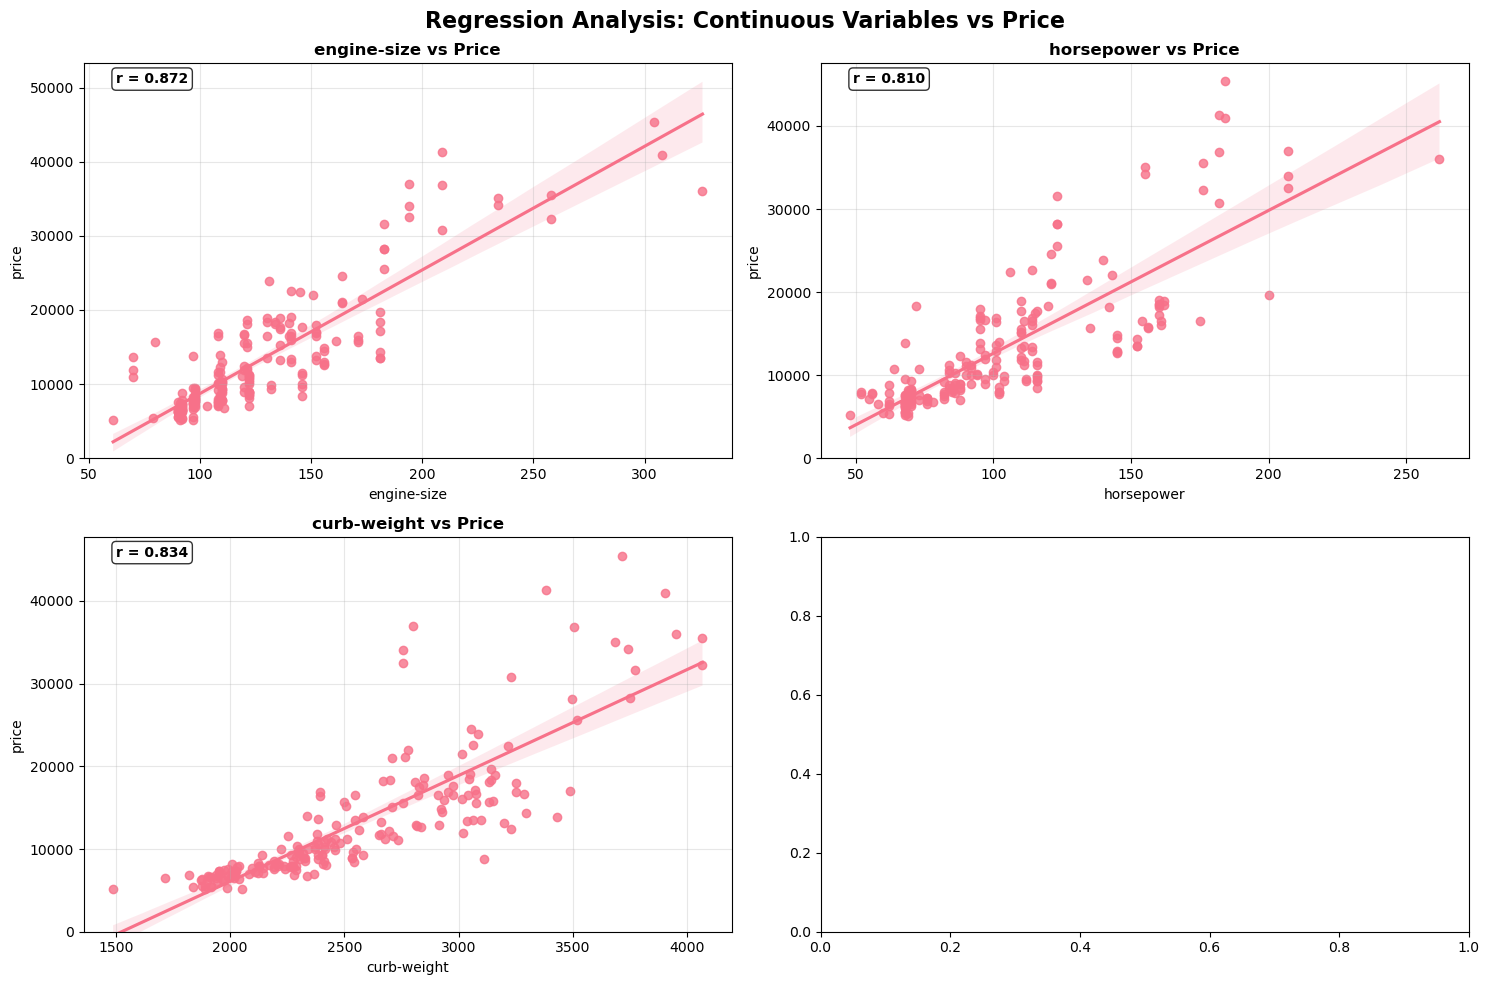


🔗 CORRELATION SUMMARY:
• engine-size    :  0.872 (Strong Positive correlation)
• horsepower     :  0.810 (Strong Positive correlation)
• curb-weight    :  0.834 (Strong Positive correlation)


In [21]:
# Analyzing key continuous variables with price
# Select important numerical features for analysis
key_features = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']
available_features = [col for col in key_features if col in df.columns]

if not available_features:
    # If key features not available, use first few numerical columns
    available_features = numerical_cols[:4]

print("📈 CONTINUOUS VARIABLE ANALYSIS")
print("=" * 50)
print(f"Analyzing: {available_features}")

# Create regression plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Regression Analysis: Continuous Variables vs Price', fontsize=16, fontweight='bold')

for i, feature in enumerate(available_features):
    row, col = i // 2, i % 2
    
    # Create regression plot
    sns.regplot(x=feature, y='price', data=df, ax=axes[row, col])
    axes[row, col].set_ylim(0,)  # Start y-axis from 0
    axes[row, col].set_title(f'{feature} vs Price', fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)
    
    # Calculate and display correlation
    if feature in df.columns and 'price' in df.columns:
        correlation = df[[feature, 'price']].corr().iloc[0, 1]
        axes[row, col].text(0.05, 0.95, f'r = {correlation:.3f}', 
                           transform=axes[row, col].transAxes,
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                           fontweight='bold')

plt.tight_layout()
plt.show()

# Print correlation summary
print("\n🔗 CORRELATION SUMMARY:")
for feature in available_features:
    if feature in df.columns and 'price' in df.columns:
        corr_matrix = df[[feature, 'price']].corr()
        correlation = corr_matrix.iloc[0, 1]
        strength = "Strong" if abs(correlation) > 0.7 else "Moderate" if abs(correlation) > 0.4 else "Weak"
        direction = "Positive" if correlation > 0 else "Negative"
        print(f"• {feature:15}: {correlation:6.3f} ({strength} {direction} correlation)")

### 2.2 Categorical Variables

For categorical variables, box plots are excellent for showing how the distribution of a continuous variable (like price) varies across different categories. This helps us identify which categories might be good predictors.

📦 CATEGORICAL VARIABLE ANALYSIS
Analyzing: ['num-of-doors', 'body-style', 'drive-wheels', 'engine-location']

📊 NUM-OF-DOORS Statistics:
                  mean      std  count
num-of-doors                          
four          13498.03  7340.34    115
two           12818.13  8721.88     86

📊 BODY-STYLE Statistics:
                 mean       std  count
body-style                            
convertible  21890.50  11187.80      6
hardtop      22208.50  14555.52      8
hatchback     9957.44   4148.86     68
sedan        14459.76   8523.21     94
wagon        12371.96   5120.95     25

📊 DRIVE-WHEELS Statistics:
                  mean      std  count
drive-wheels                          
4wd           10241.00  3288.21      8
fwd            9244.78  3345.90    118
rwd           19757.61  9082.58     75

📊 ENGINE-LOCATION Statistics:
                     mean      std  count
engine-location                          
front            12884.09  7552.28    198
rear             34528.00  2

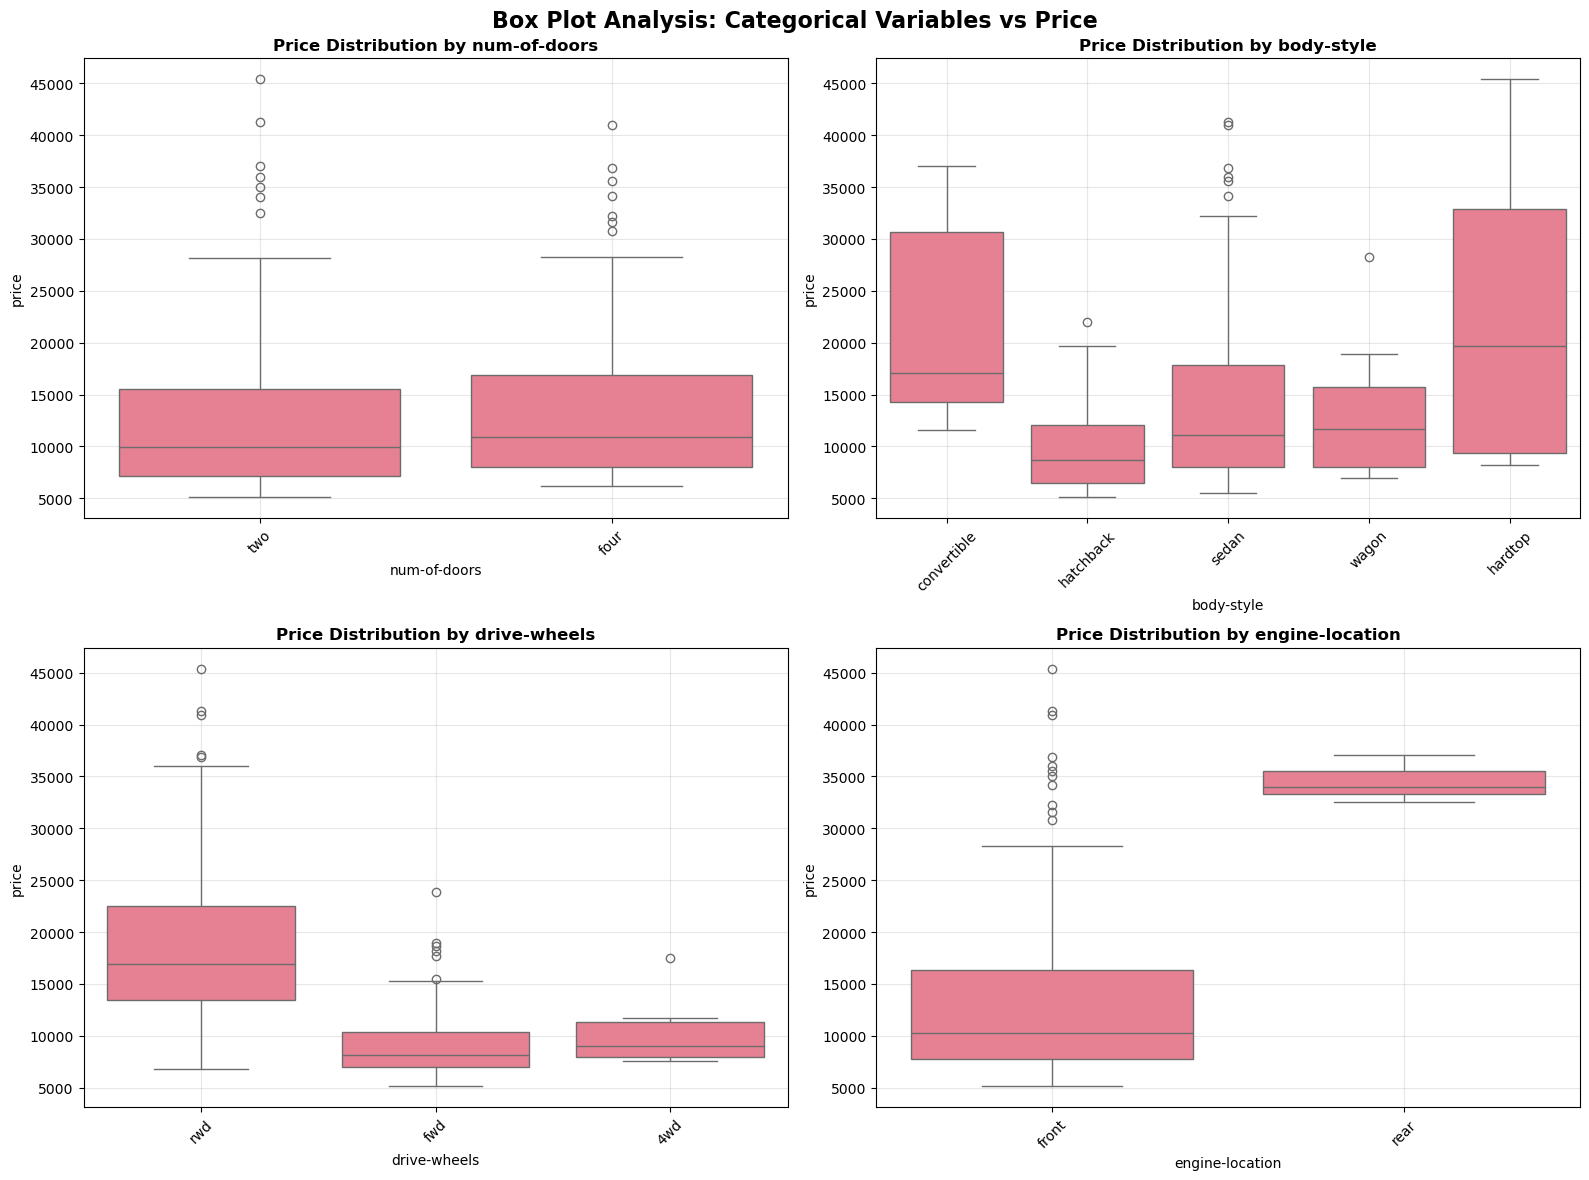


💡 INTERPRETATION GUIDE:
• Look for categories with distinct price ranges (minimal overlap)
• Categories with similar distributions may not be good predictors
• Consider the number of observations in each category


In [22]:
# Analyzing categorical variables with box plots
print("📦 CATEGORICAL VARIABLE ANALYSIS")
print("=" * 50)

# Find suitable categorical variables with reasonable number of categories
categorical_features = []
for col in categorical_cols:
    if col in df.columns:
        unique_count = df[col].nunique()
        if 2 <= unique_count <= 8:  # Reasonable number for visualization
            categorical_features.append(col)

# Also check for key categorical variables from automotive context
key_categorical = ['body-style', 'drive-wheels', 'engine-location', 'make']
for col in key_categorical:
    if col in df.columns and col not in categorical_features:
        if df[col].nunique() <= 8:
            categorical_features.append(col)

# Take first 4 for visualization
categorical_features = categorical_features[:4]

if len(categorical_features) >= 2:
    print(f"Analyzing: {categorical_features}")
    
    # Create box plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Box Plot Analysis: Categorical Variables vs Price', fontsize=16, fontweight='bold')
    
    for i, feature in enumerate(categorical_features):
        row, col = i // 2, i % 2
        
        # Create box plot
        sns.boxplot(x=feature, y='price', data=df, ax=axes[row, col])
        axes[row, col].set_title(f'Price Distribution by {feature}', fontweight='bold')
        axes[row, col].tick_params(axis='x', rotation=45)
        axes[row, col].grid(True, alpha=0.3)
        
        # Calculate basic statistics
        if feature in df.columns and 'price' in df.columns:
            grouped_stats = df.groupby(feature)['price'].agg(['mean', 'std', 'count'])
            print(f"\n📊 {feature.upper()} Statistics:")
            print(grouped_stats.round(2))
    
    plt.tight_layout()
    plt.show()
    
    # Interpretation guidance
    print("\n💡 INTERPRETATION GUIDE:")
    print("• Look for categories with distinct price ranges (minimal overlap)")
    print("• Categories with similar distributions may not be good predictors")
    print("• Consider the number of observations in each category")
    
else:
    print("⚠️ Limited categorical variables available for analysis")
    print(f"Available: {categorical_features}")

## 3. Descriptive Statistical Analysis

Descriptive statistics provide a quantitative summary of our data. The `describe()` method automatically computes basic statistics for all variables, helping us understand:

- **Count**: Number of non-null observations
- **Mean**: Average value
- **Std**: Standard deviation (measure of spread)
- **Min/Max**: Range of values
- **25%, 50%, 75%**: Quartiles (Interquartile Range)

In [23]:
# Descriptive statistics for numerical variables
print("📊 DESCRIPTIVE STATISTICS - NUMERICAL VARIABLES")
print("=" * 60)

numerical_desc = df.describe()
print(numerical_desc.round(2))

print(f"\n🔍 Key Insights:")
print(f"• Dataset contains {len(df)} observations")
print(f"• Numerical variables: {len(numerical_desc.columns)}")

# Identify variables with high variation
high_variation = []
for col in numerical_desc.columns:
    if col in df.columns:
        cv = numerical_desc.loc['std', col] / numerical_desc.loc['mean', col]  # Coefficient of variation
        if cv > 0.5:  # High variation threshold
            high_variation.append(col)

if high_variation:
    print(f"• High variation variables: {high_variation}")

print("\n" + "=" * 60)
print("📊 DESCRIPTIVE STATISTICS - CATEGORICAL VARIABLES")
print("=" * 60)

# Descriptive statistics for categorical variables
categorical_desc = df.describe(include=['object'])
print(categorical_desc)

📊 DESCRIPTIVE STATISTICS - NUMERICAL VARIABLES
       symboling  normalized-losses  wheel-base  length   width  height  \
count     201.00              201.0      201.00  201.00  201.00  201.00   
mean        0.84              122.0       98.80    0.84    0.92    0.90   
std         1.25               32.0        6.07    0.06    0.03    0.04   
min        -2.00               65.0       86.60    0.68    0.84    0.80   
25%         0.00              101.0       94.50    0.80    0.89    0.87   
50%         1.00              122.0       97.00    0.83    0.91    0.90   
75%         2.00              137.0      102.40    0.88    0.92    0.93   
max         3.00              256.0      120.90    1.00    1.00    1.00   

       curb-weight  engine-size    bore  stroke  compression-ratio  \
count       201.00       201.00  201.00  201.00             201.00   
mean       2555.67       126.88    3.33    3.26              10.16   
std         517.30        41.55    0.27    0.32               4.00 

In [24]:
# Value counts analysis for key categorical variables
print("📈 VALUE COUNTS ANALYSIS")
print("=" * 50)

# Analyze value distribution for categorical variables
if categorical_features:
    for feature in categorical_features[:3]:  # Analyze first 3 categorical features
        if feature in df.columns:
            print(f"\n🏷️ {feature.upper()} Distribution:")
            
            # Get value counts
            value_counts = df[feature].value_counts()
            print(value_counts)
            
            # Convert to DataFrame for better formatting
            value_counts_df = value_counts.to_frame()
            value_counts_df.rename(columns={feature: 'count'}, inplace=True)
            value_counts_df.index.name = feature
            
            # Calculate percentages
            value_counts_df['percentage'] = (value_counts_df['count'] / value_counts_df['count'].sum() * 100).round(1)
            
            print(f"\n📊 {feature} Summary:")
            print(f"• Unique categories: {len(value_counts)}")
            print(f"• Most common: {value_counts.index[0]} ({value_counts.iloc[0]} cars)")
            print(f"• Distribution balance: {'Balanced' if value_counts.std()/value_counts.mean() < 0.5 else 'Imbalanced'}")

print(f"\n💡 Why Value Counts Matter:")
print("• Helps identify data imbalances")
print("• Shows which categories have sufficient data for analysis")
print("• Reveals potential outlier categories with very few observations")

📈 VALUE COUNTS ANALYSIS

🏷️ NUM-OF-DOORS Distribution:
num-of-doors
four    115
two      86
Name: count, dtype: int64

📊 num-of-doors Summary:
• Unique categories: 2
• Most common: four (115 cars)
• Distribution balance: Balanced

🏷️ BODY-STYLE Distribution:
body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

📊 body-style Summary:
• Unique categories: 5
• Most common: sedan (94 cars)
• Distribution balance: Imbalanced

🏷️ DRIVE-WHEELS Distribution:
drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

📊 drive-wheels Summary:
• Unique categories: 3
• Most common: fwd (118 cars)
• Distribution balance: Imbalanced

💡 Why Value Counts Matter:
• Helps identify data imbalances
• Shows which categories have sufficient data for analysis
• Reveals potential outlier categories with very few observations


## 4. Basics of Grouping and Pivot Tables

The `groupby` method is powerful for analyzing data by different categories. It allows us to:

- **Group data** based on one or several variables
- **Perform analysis** on individual groups (mean, sum, count, etc.)
- **Compare characteristics** across different categories

Pivot tables help us visualize grouped data in a spreadsheet-like format, making patterns easier to identify.

In [25]:
# GroupBy Analysis
print("👥 GROUPBY ANALYSIS")
print("=" * 50)

# Single variable grouping
if len(categorical_features) >= 1:
    group_var = categorical_features[0]
    print(f"🔍 Analyzing average price by {group_var}")
    
    # Group by single variable
    df_group_single = df[[group_var, 'price']].groupby([group_var], as_index=False).mean()
    print(f"\nAverage price by {group_var}:")
    print(df_group_single.round(2))
    
    # Identify highest and lowest price categories
    max_price_cat = df_group_single.loc[df_group_single['price'].idxmax(), group_var]
    min_price_cat = df_group_single.loc[df_group_single['price'].idxmin(), group_var]
    
    print(f"\n💰 Price Analysis:")
    print(f"• Highest average price: {max_price_cat}")
    print(f"• Lowest average price: {min_price_cat}")

# Multi-variable grouping
if len(categorical_features) >= 2:
    var1, var2 = categorical_features[0], categorical_features[1]
    print(f"\n🔍 Multi-variable grouping: {var1} and {var2}")
    
    # Group by multiple variables
    df_group_multi = df[[var1, var2, 'price']].groupby([var1, var2], as_index=False).mean()
    print(f"\nAverage price by {var1} and {var2}:")
    print(df_group_multi.round(2))
    
    print(f"\n📊 CREATING PIVOT TABLE")
    print("=" * 30)
    
    # Create pivot table
    grouped_pivot = df_group_multi.pivot(index=var1, columns=var2, values='price')
    
    # Fill missing values with 0
    grouped_pivot = grouped_pivot.fillna(0)
    print("Pivot table (0 = no data for this combination):")
    print(grouped_pivot.round(0))
    
    print(f"\n💡 Pivot Table Benefits:")
    print("• Easy to compare values across categories")
    print("• Identifies data gaps (empty combinations)")
    print("• Enables quick pattern recognition")
else:
    print("⚠️ Insufficient categorical variables for multi-variable grouping")

👥 GROUPBY ANALYSIS
🔍 Analyzing average price by num-of-doors

Average price by num-of-doors:
  num-of-doors     price
0         four  13498.03
1          two  12818.13

💰 Price Analysis:
• Highest average price: four
• Lowest average price: two

🔍 Multi-variable grouping: num-of-doors and body-style

Average price by num-of-doors and body-style:
  num-of-doors   body-style     price
0         four    hatchback   8372.00
1         four        sedan  14490.69
2         four        wagon  12371.96
3          two  convertible  21890.50
4          two      hardtop  22208.50
5          two    hatchback  10230.79
6          two        sedan  14283.00

📊 CREATING PIVOT TABLE
Pivot table (0 = no data for this combination):
body-style    convertible  hardtop  hatchback    sedan    wagon
num-of-doors                                                   
four                  0.0      0.0     8372.0  14491.0  12372.0
two               21890.0  22208.0    10231.0  14283.0      0.0

💡 Pivot Table Benef

🎨 HEAT MAP VISUALIZATION


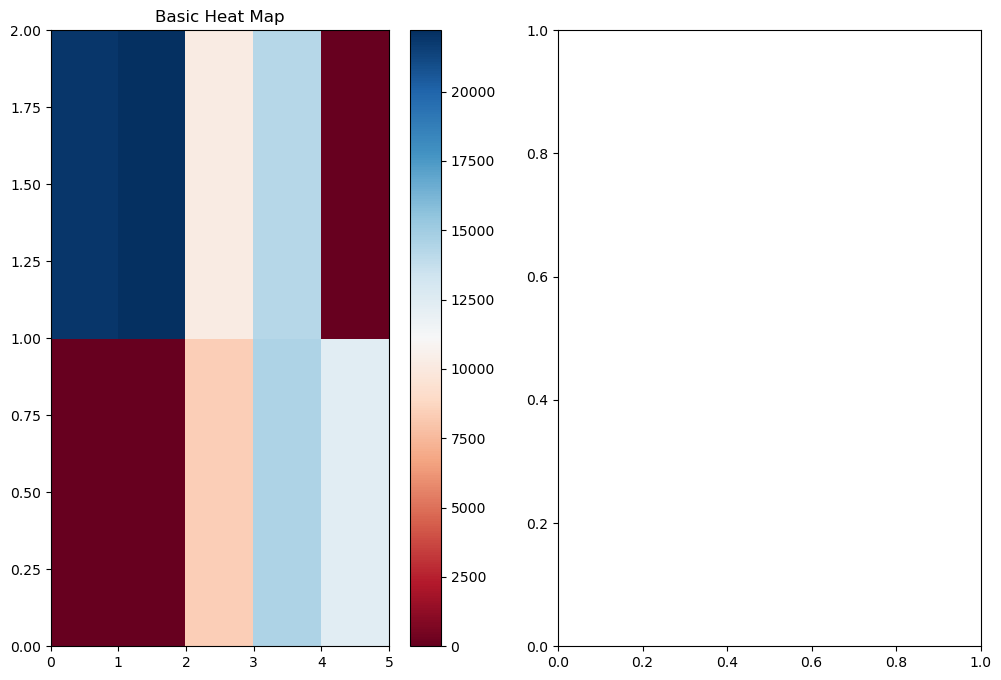

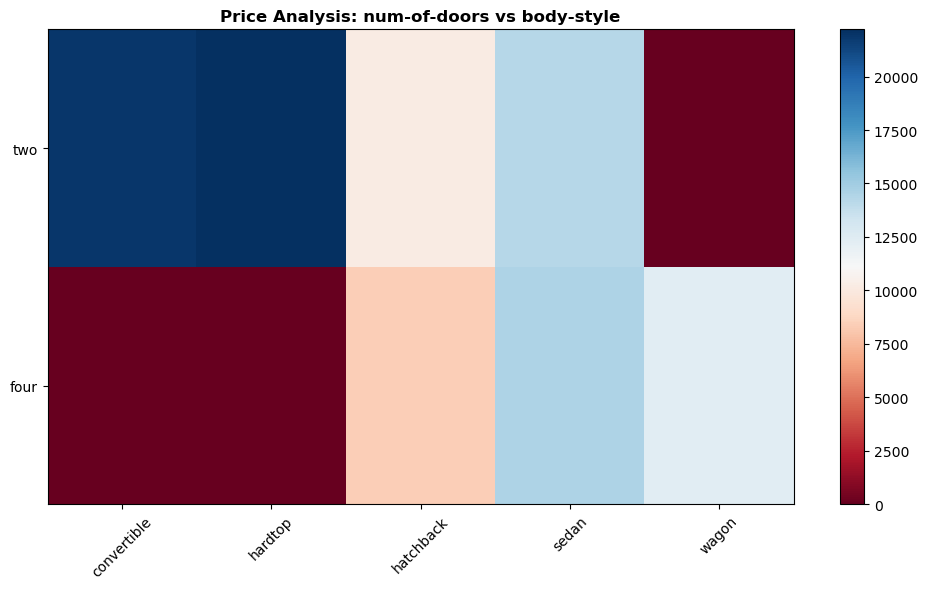

🎯 Heat Map Interpretation:
• Red colors = Higher prices
• Blue colors = Lower prices
• White/Empty = No data for this combination


In [26]:
# Visualizing Pivot Table with Heat Map
if len(categorical_features) >= 2 and 'grouped_pivot' in locals():
    print("🎨 HEAT MAP VISUALIZATION")
    print("=" * 50)
    
    # Create heat map
    plt.figure(figsize=(12, 8))
    
    # Simple heat map
    plt.subplot(1, 2, 1)
    plt.pcolor(grouped_pivot, cmap='RdBu')
    plt.colorbar()
    plt.title('Basic Heat Map')
    
    # Enhanced heat map with labels
    plt.subplot(1, 2, 2)
    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.pcolor(grouped_pivot, cmap='RdBu')
    
    # Label names
    if hasattr(grouped_pivot.columns, 'levels'):
        row_labels = grouped_pivot.columns.levels[0] if grouped_pivot.columns.nlevels > 1 else grouped_pivot.columns
    else:
        row_labels = grouped_pivot.columns
    col_labels = grouped_pivot.index
    
    # Move ticks and labels to center
    ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
    
    # Insert labels
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(col_labels, minor=False)
    
    # Rotate labels if too long
    plt.xticks(rotation=45)
    plt.title(f'Price Analysis: {var1} vs {var2}', fontweight='bold')
    
    fig.colorbar(im)
    plt.tight_layout()
    plt.show()
    
    print("🎯 Heat Map Interpretation:")
    print("• Red colors = Higher prices")
    print("• Blue colors = Lower prices") 
    print("• White/Empty = No data for this combination")
    
else:
    print("⚠️ Heat map requires at least 2 categorical variables")

## 5. Correlation and Causation

Understanding the difference between correlation and causation is crucial in data analysis:

- **Correlation**: A measure of the extent of interdependence between variables
- **Causation**: The relationship between cause and effect between two variables

⚠️ **Important**: Correlation does not imply causation! 

### 5.1 Pearson Correlation

The **Pearson Correlation Coefficient** measures linear dependence between two variables X and Y.

**Interpretation:**
- **+1**: Perfect positive linear correlation
- **0**: No linear correlation  
- **-1**: Perfect negative linear correlation

**Strength Guidelines:**
- |r| > 0.7: Strong correlation
- 0.4 < |r| ≤ 0.7: Moderate correlation  
- |r| ≤ 0.4: Weak correlation

🔗 CORRELATION MATRIX ANALYSIS
Full correlation matrix:
                   symboling  normalized-losses  wheel-base  length  width  \
symboling              1.000              0.466      -0.536  -0.365 -0.242   
normalized-losses      0.466              1.000      -0.057   0.019  0.087   
wheel-base            -0.536             -0.057       1.000   0.876  0.815   
length                -0.365              0.019       0.876   1.000  0.857   
width                 -0.242              0.087       0.815   0.857  1.000   
height                -0.550             -0.374       0.591   0.492  0.306   
curb-weight           -0.233              0.099       0.782   0.881  0.866   
engine-size           -0.111              0.112       0.572   0.685  0.729   
bore                  -0.140             -0.030       0.493   0.609  0.545   
stroke                -0.008              0.055       0.158   0.124  0.189   
compression-ratio     -0.182             -0.115       0.250   0.160  0.190   
horsepowe

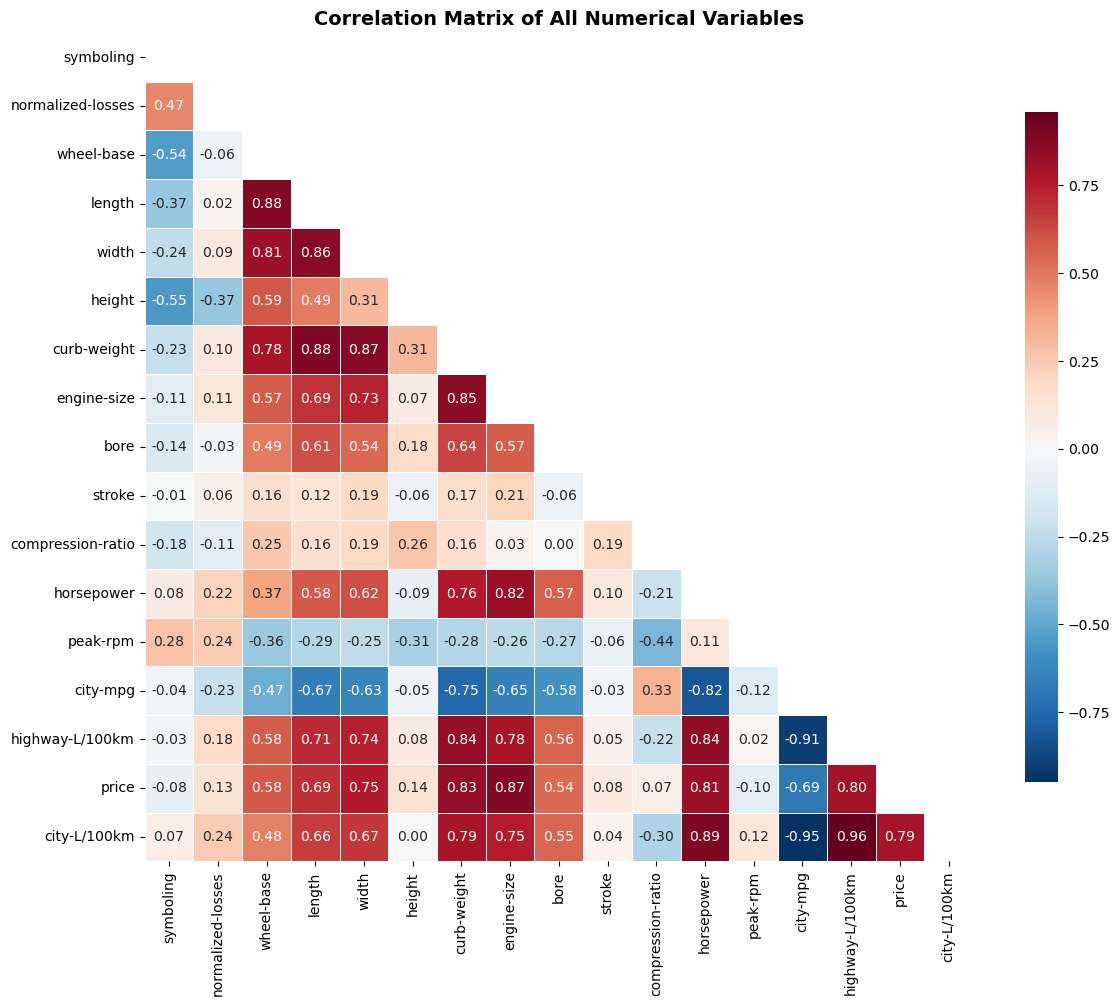


🎯 CORRELATION INSIGHTS:
• Diagonal values are always 1.0 (variable correlated with itself)
• Matrix is symmetric (correlation of A with B = correlation of B with A)
• We show only lower triangle to avoid redundancy


In [27]:
# Overall correlation analysis
print("🔗 CORRELATION MATRIX ANALYSIS")
print("=" * 50)

# Calculate correlation matrix for numerical variables only
corr_matrix = df[numerical_cols].corr()
print("Full correlation matrix:")
print(corr_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')
plt.title('Correlation Matrix of All Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🎯 CORRELATION INSIGHTS:")
print("• Diagonal values are always 1.0 (variable correlated with itself)")
print("• Matrix is symmetric (correlation of A with B = correlation of B with A)")
print("• We show only lower triangle to avoid redundancy")

In [28]:
# Detailed correlation analysis with p-values
print("📊 DETAILED CORRELATION ANALYSIS WITH STATISTICAL SIGNIFICANCE")
print("=" * 70)

# Focus on correlations with price (our target variable)
if 'price' in df.columns:
    price_correlations = []
    
    for col in numerical_cols:
        if col != 'price' and col in df.columns:
            # Calculate Pearson correlation and p-value
            corr_coef, p_value = stats.pearsonr(df[col].dropna(), df['price'].dropna())
            
            # Determine significance level
            if p_value < 0.001:
                significance = "*** (Very Strong Evidence)"
            elif p_value < 0.01:
                significance = "** (Strong Evidence)"
            elif p_value < 0.05:
                significance = "* (Moderate Evidence)"
            elif p_value < 0.1:
                significance = ". (Weak Evidence)"
            else:
                significance = "ns (No Evidence)"
            
            price_correlations.append({
                'Variable': col,
                'Correlation': corr_coef,
                'P_value': p_value,
                'Significance': significance
            })
    
    # Sort by absolute correlation strength
    price_correlations.sort(key=lambda x: abs(x['Correlation']), reverse=True)
    
    print(f"🎯 CORRELATIONS WITH PRICE (sorted by strength):")
    print("Significance levels: *** p<0.001, ** p<0.01, * p<0.05, . p<0.1, ns = not significant\n")
    
    for item in price_correlations:
        corr_strength = "Strong" if abs(item['Correlation']) > 0.7 else "Moderate" if abs(item['Correlation']) > 0.4 else "Weak"
        direction = "Positive" if item['Correlation'] > 0 else "Negative"
        
        print(f"• {item['Variable']:20}: r = {item['Correlation']:6.3f} ({corr_strength} {direction}) {item['Significance']}")
        
        # Detailed interpretation for strongest correlations
        if abs(item['Correlation']) > 0.5:
            print(f"  └─ P-value: {item['P_value']:.2e}")
            if item['P_value'] < 0.05:
                print(f"  └─ ✅ Statistically significant relationship")
            else:
                print(f"  └─ ❌ Not statistically significant")
    
    # Summary of significant predictors
    significant_predictors = [item for item in price_correlations if item['P_value'] < 0.05 and abs(item['Correlation']) > 0.3]
    
    print(f"\n🏆 SUMMARY - STRONG PRICE PREDICTORS:")
    print(f"Variables with significant correlation (p<0.05) and |r|>0.3:")
    for pred in significant_predictors:
        print(f"• {pred['Variable']:20}: r = {pred['Correlation']:6.3f}")
        
    print(f"\nTotal significant predictors: {len(significant_predictors)}")
    
else:
    print("⚠️ Price variable not found for correlation analysis")

📊 DETAILED CORRELATION ANALYSIS WITH STATISTICAL SIGNIFICANCE
🎯 CORRELATIONS WITH PRICE (sorted by strength):
Significance levels: *** p<0.001, ** p<0.01, * p<0.05, . p<0.1, ns = not significant

• engine-size         : r =  0.872 (Strong Positive) *** (Very Strong Evidence)
  └─ P-value: 9.27e-64
  └─ ✅ Statistically significant relationship
• curb-weight         : r =  0.834 (Strong Positive) *** (Very Strong Evidence)
  └─ P-value: 2.19e-53
  └─ ✅ Statistically significant relationship
• horsepower          : r =  0.810 (Strong Positive) *** (Very Strong Evidence)
  └─ P-value: 6.27e-48
  └─ ✅ Statistically significant relationship
• highway-L/100km     : r =  0.801 (Strong Positive) *** (Very Strong Evidence)
  └─ P-value: 3.05e-46
  └─ ✅ Statistically significant relationship
• city-L/100km        : r =  0.790 (Strong Positive) *** (Very Strong Evidence)
  └─ P-value: 3.90e-44
  └─ ✅ Statistically significant relationship
• width               : r =  0.751 (Strong Positive) *** (V

## 6. Conclusion: Key Findings and Important Variables

Based on our comprehensive exploratory data analysis, we can now identify the main characteristics that have the most impact on car price.

In [29]:
# Final Summary and Recommendations
print("🎯 EXPLORATORY DATA ANALYSIS - FINAL SUMMARY")
print("=" * 60)

# Summarize findings from analysis
if 'significant_predictors' in locals() and significant_predictors:
    print("🏆 MOST IMPORTANT VARIABLES FOR PREDICTING CAR PRICE:")
    print("\nContinuous Numerical Variables:")
    
    numerical_predictors = [p for p in significant_predictors if p['Variable'] in numerical_cols]
    for i, pred in enumerate(numerical_predictors, 1):
        correlation_strength = "Very Strong" if abs(pred['Correlation']) > 0.8 else "Strong" if abs(pred['Correlation']) > 0.6 else "Moderate"
        print(f"{i}. {pred['Variable']:20} (r = {pred['Correlation']:6.3f}) - {correlation_strength} predictor")
    
    print(f"\nCategorical Variables (from box plot analysis):")
    for i, cat_var in enumerate(categorical_features[:3], 1):
        print(f"{i}. {cat_var:20} - Showed distinct price distributions")

print(f"\n📋 ANALYSIS TECHNIQUES COVERED:")
print("✅ Individual feature visualization (regression plots, box plots)")
print("✅ Descriptive statistical analysis")
print("✅ Value counts and distribution analysis") 
print("✅ GroupBy operations and pivot tables")
print("✅ Correlation analysis with significance testing")
print("✅ Heat map visualization")

print(f"\n💡 KEY INSIGHTS:")
print("• Strong correlations (|r| > 0.7) indicate potential good predictors")
print("• P-values < 0.05 suggest statistically significant relationships")
print("• Box plots help identify categorical variables with distinct price ranges")
print("• GroupBy analysis reveals price differences across categories")
print("• Heat maps visualize complex relationships between multiple variables")

print(f"\n🚀 NEXT STEPS:")
print("• Use identified important variables for machine learning models")
print("• Consider feature engineering based on discovered relationships")
print("• Validate findings with additional statistical tests")
print("• Build predictive models using the most correlated features")

print(f"\n" + "=" * 60)
print("🎉 EXPLORATORY DATA ANALYSIS COMPLETE!")
print("=" * 60)
print("\nYou now have a comprehensive understanding of:")
print("• Data structure and quality")
print("• Individual variable characteristics") 
print("• Relationships between variables")
print("• Statistical significance of relationships")
print("• Most important predictors for car price")

print(f"\n📚 This analysis provides the foundation for:")
print("• Feature selection in machine learning")
print("• Data preprocessing decisions")
print("• Model building strategies")
print("• Business insights and decision making")

🎯 EXPLORATORY DATA ANALYSIS - FINAL SUMMARY
🏆 MOST IMPORTANT VARIABLES FOR PREDICTING CAR PRICE:

Continuous Numerical Variables:
1. engine-size          (r =  0.872) - Very Strong predictor
2. curb-weight          (r =  0.834) - Very Strong predictor
3. horsepower           (r =  0.810) - Very Strong predictor
4. highway-L/100km      (r =  0.801) - Very Strong predictor
5. city-L/100km         (r =  0.790) - Strong predictor
6. width                (r =  0.751) - Strong predictor
7. length               (r =  0.691) - Strong predictor
8. city-mpg             (r = -0.687) - Strong predictor
9. wheel-base           (r =  0.585) - Moderate predictor
10. bore                 (r =  0.543) - Moderate predictor

Categorical Variables (from box plot analysis):
1. num-of-doors         - Showed distinct price distributions
2. body-style           - Showed distinct price distributions
3. drive-wheels         - Showed distinct price distributions

📋 ANALYSIS TECHNIQUES COVERED:
✅ Individual featu

## 7. Data Wrangling and Quality Assessment

**Data wrangling** is the process of cleaning, transforming, and preparing data for analysis. Real-world data is often messy and requires preprocessing before meaningful analysis can be performed.

### Key Data Quality Issues:
- **Missing values**: Gaps in the dataset that need to be handled
- **Incorrect data types**: Variables stored in wrong formats
- **Outliers**: Extreme values that may skew analysis
- **Inconsistent formatting**: Variations in how data is represented
- **Duplicate records**: Repeated observations that may bias results

### Data Wrangling Techniques:
1. **Missing data handling**: Imputation, deletion, or interpolation
2. **Data type conversion**: Ensuring variables have correct types
3. **Data standardization**: Normalizing formats and scales
4. **Outlier detection**: Identifying and handling extreme values
5. **Data validation**: Checking for logical consistency

In [ ]:
# Comprehensive Data Quality Assessment
print("🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT")
print("=" * 60)

# 1. Missing Data Analysis
print("📋 MISSING DATA ANALYSIS")
print("-" * 30)

missing_data = df.isnull()
total_missing = missing_data.sum()
percent_missing = (total_missing / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': total_missing,
    'Missing_Percentage': percent_missing
}).sort_values('Missing_Percentage', ascending=False)

print("Missing data summary:")
print(missing_summary[missing_summary['Missing_Count'] > 0])

if missing_summary['Missing_Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print(f"⚠️ Total missing values: {missing_summary['Missing_Count'].sum()}")

# 2. Data Type Analysis
print(f"\n📊 DATA TYPE ANALYSIS")
print("-" * 30)

dtype_summary = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Non_Null_Count': df.count(),
    'Unique_Values': df.nunique()
})

print("Data type summary:")
print(dtype_summary)

# 3. Outlier Detection for Numerical Variables
print(f"\n📈 OUTLIER DETECTION (IQR Method)")
print("-" * 40)

outlier_summary = []

for col in numerical_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percentage': round(outlier_percentage, 2),
            'Lower_Bound': round(lower_bound, 2),
            'Upper_Bound': round(upper_bound, 2)
        })

outlier_df = pd.DataFrame(outlier_summary)
print("Outlier analysis (using IQR method):")
print(outlier_df)

# Visualize outliers for key numerical variables
if len(available_features) >= 2:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Outlier Detection: Box Plots for Key Variables', fontsize=16)
    
    for i, feature in enumerate(available_features[:2]):
        if feature in df.columns:
            df.boxplot(column=feature, ax=axes[i])
            axes[i].set_title(f'{feature} - Outlier Detection')
            axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print(f"\n💡 Outlier Interpretation:")
print("• Values beyond 1.5 × IQR from Q1/Q3 are considered outliers")
print("• High outlier percentages may indicate data quality issues")
print("• Consider domain knowledge before removing outliers")

### 7.1 Data Transformation and Normalization

**Data transformation** involves converting data from one format or structure to another. This is essential for:
- **Standardizing scales**: Ensuring all variables have similar ranges
- **Normalizing distributions**: Making data more suitable for analysis
- **Creating new features**: Deriving meaningful variables from existing ones
- **Handling categorical variables**: Converting categories to numerical formats

### Common Transformation Techniques:

**Scaling Methods:**
- **Min-Max Scaling**: Scales data to [0,1] range
- **Z-Score Standardization**: Mean=0, Std=1
- **Robust Scaling**: Uses median and IQR (less sensitive to outliers)

**Distribution Transformations:**
- **Log transformation**: For right-skewed data
- **Square root**: For moderate skewness
- **Box-Cox**: General power transformations

**Categorical Encoding:**
- **One-hot encoding**: Creates binary columns for each category
- **Label encoding**: Assigns numerical values to categories
- **Ordinal encoding**: For ordered categorical data

In [ ]:
# Data Transformation and Normalization Examples
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

print("🔄 DATA TRANSFORMATION AND NORMALIZATION")
print("=" * 60)

# Select a numerical feature for transformation demonstration
if 'price' in df.columns:
    demo_feature = 'price'
    demo_data = df[demo_feature].dropna()
    
    print(f"📊 Demonstrating transformations on '{demo_feature}'")
    print(f"Original data statistics:")
    print(f"• Mean: {demo_data.mean():.2f}")
    print(f"• Std: {demo_data.std():.2f}")
    print(f"• Min: {demo_data.min():.2f}")
    print(f"• Max: {demo_data.max():.2f}")
    print(f"• Skewness: {demo_data.skew():.2f}")
    
    # Apply different scaling methods
    scalers = {
        'Min-Max Scaling': MinMaxScaler(),
        'Standard Scaling': StandardScaler(),
        'Robust Scaling': RobustScaler()
    }
    
    # Create visualization of different scaling methods
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Data Transformation Methods: {demo_feature}', fontsize=16)
    
    # Original distribution
    axes[0, 0].hist(demo_data, bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[0, 0].set_title('Original Data')
    axes[0, 0].set_xlabel(demo_feature)
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Apply and visualize scaling methods
    plot_positions = [(0, 1), (1, 0), (1, 1)]
    
    for idx, (name, scaler) in enumerate(scalers.items()):
        row, col = plot_positions[idx]
        
        # Transform data
        data_reshaped = demo_data.values.reshape(-1, 1)
        transformed_data = scaler.fit_transform(data_reshaped).flatten()
        
        # Plot distribution
        axes[row, col].hist(transformed_data, bins=30, alpha=0.7, 
                           color=['orange', 'green', 'red'][idx], edgecolor='black')
        axes[row, col].set_title(f'{name}')
        axes[row, col].set_xlabel('Transformed Value')
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].grid(True, alpha=0.3)
        
        # Add statistics
        axes[row, col].text(0.05, 0.95, 
                           f'Mean: {transformed_data.mean():.2f}\nStd: {transformed_data.std():.2f}',
                           transform=axes[row, col].transAxes,
                           verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 SCALING METHOD COMPARISON:")
    print("-" * 40)
    
    for name, scaler in scalers.items():
        data_reshaped = demo_data.values.reshape(-1, 1)
        transformed = scaler.fit_transform(data_reshaped).flatten()
        print(f"{name:20}: Mean={transformed.mean():6.2f}, Std={transformed.std():6.2f}, "
              f"Min={transformed.min():6.2f}, Max={transformed.max():6.2f}")

# Demonstrate categorical encoding if categorical variables exist
if categorical_features:
    print(f"\n🏷️ CATEGORICAL VARIABLE ENCODING")
    print("-" * 40)
    
    sample_cat_var = categorical_features[0]
    if sample_cat_var in df.columns:
        print(f"Demonstrating encoding on '{sample_cat_var}'")
        
        # Original categories
        unique_categories = df[sample_cat_var].unique()
        print(f"Original categories: {unique_categories}")
        
        # Label Encoding
        label_encoder = LabelEncoder()
        encoded_labels = label_encoder.fit_transform(df[sample_cat_var])
        
        print(f"\nLabel Encoding mapping:")
        for i, category in enumerate(label_encoder.classes_):
            print(f"• {category} → {i}")
        
        # One-hot encoding demonstration
        one_hot_encoded = pd.get_dummies(df[sample_cat_var], prefix=sample_cat_var)
        print(f"\nOne-hot encoding creates {one_hot_encoded.shape[1]} binary columns:")
        print(one_hot_encoded.head())

print(f"\n💡 TRANSFORMATION GUIDELINES:")
print("• Use Min-Max scaling when you need data in [0,1] range")
print("• Use Standard scaling when data follows normal distribution")
print("• Use Robust scaling when data has outliers")
print("• Use log transformation for right-skewed data")
print("• Use one-hot encoding for nominal categorical variables")
print("• Use label encoding for ordinal categorical variables")

## 8. Advanced Statistical Analysis

**Advanced statistical analysis** goes beyond basic descriptive statistics to provide deeper insights into data patterns, relationships, and significance.

### Key Statistical Concepts:

**Distribution Analysis:**
- **Normality testing**: Checking if data follows normal distribution
- **Skewness and Kurtosis**: Measuring distribution shape characteristics
- **Q-Q plots**: Visual assessment of distribution fit

**Hypothesis Testing:**
- **T-tests**: Comparing means between groups
- **Chi-square tests**: Testing relationships between categorical variables
- **ANOVA**: Comparing means across multiple groups
- **Non-parametric tests**: For non-normal data

**Advanced Correlation Analysis:**
- **Spearman correlation**: For non-linear relationships
- **Partial correlation**: Controlling for confounding variables
- **Correlation significance**: Understanding p-values and confidence intervals

**Effect Size Measurements:**
- **Cohen's d**: Standardized difference between means
- **Eta-squared**: Proportion of variance explained
- **Cramér's V**: Association strength for categorical variables

In [ ]:
# Advanced Statistical Analysis
from scipy import stats
from scipy.stats import normaltest, shapiro, spearmanr, chi2_contingency
import scipy.stats as stats

print("📊 ADVANCED STATISTICAL ANALYSIS")
print("=" * 60)

# 1. Distribution Analysis and Normality Testing
print("📈 DISTRIBUTION ANALYSIS AND NORMALITY TESTING")
print("-" * 50)

# Test normality for key numerical variables
normality_results = []

for feature in available_features:
    if feature in df.columns:
        data = df[feature].dropna()
        
        # Shapiro-Wilk test (best for small samples)
        shapiro_stat, shapiro_p = shapiro(data)
        
        # D'Agostino's normality test (good for larger samples)
        dagostino_stat, dagostino_p = normaltest(data)
        
        # Calculate skewness and kurtosis
        skewness = stats.skew(data)
        kurtosis_val = stats.kurtosis(data)
        
        normality_results.append({
            'Variable': feature,
            'Shapiro_p_value': shapiro_p,
            'DAgostino_p_value': dagostino_p,
            'Skewness': skewness,
            'Kurtosis': kurtosis_val,
            'Normal_Distribution': 'Yes' if shapiro_p > 0.05 and dagostino_p > 0.05 else 'No'
        })

normality_df = pd.DataFrame(normality_results)
print("Normality test results (p > 0.05 indicates normal distribution):")
print(normality_df.round(4))

# Create Q-Q plots for distribution assessment
if len(available_features) >= 2:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Q-Q Plots: Assessing Normality', fontsize=16)
    
    for i, feature in enumerate(available_features[:2]):
        if feature in df.columns:
            data = df[feature].dropna()
            stats.probplot(data, dist="norm", plot=axes[i])
            axes[i].set_title(f'{feature} - Q-Q Plot')
            axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print(f"\n💡 Normality Interpretation:")
print("• Q-Q plot points on diagonal line indicate normal distribution")
print("• Skewness close to 0 indicates symmetric distribution")
print("• Kurtosis close to 0 indicates normal tail behavior")

# 2. Hypothesis Testing Examples
print(f"\n🔬 HYPOTHESIS TESTING EXAMPLES")
print("-" * 40)

# Example: Compare price means between different categories
if len(categorical_features) >= 1 and 'price' in df.columns:
    test_category = categorical_features[0]
    
    print(f"Testing price differences across {test_category} categories:")
    
    # Get unique categories
    categories = df[test_category].unique()
    category_data = []
    
    for category in categories:
        cat_prices = df[df[test_category] == category]['price'].dropna()
        if len(cat_prices) > 0:
            category_data.append(cat_prices)
    
    if len(category_data) >= 2:
        # Perform one-way ANOVA
        f_statistic, anova_p_value = stats.f_oneway(*category_data)
        
        print(f"One-way ANOVA results:")
        print(f"• F-statistic: {f_statistic:.4f}")
        print(f"• P-value: {anova_p_value:.4f}")
        print(f"• Significant difference: {'Yes' if anova_p_value < 0.05 else 'No'}")
        
        # Pairwise t-tests for detailed comparison
        if len(category_data) == 2:
            t_stat, t_p_value = stats.ttest_ind(category_data[0], category_data[1])
            print(f"\nPairwise t-test:")
            print(f"• T-statistic: {t_stat:.4f}")
            print(f"• P-value: {t_p_value:.4f}")
            
            # Calculate effect size (Cohen's d)
            pooled_std = np.sqrt(((len(category_data[0])-1)*category_data[0].var() + 
                                 (len(category_data[1])-1)*category_data[1].var()) / 
                                (len(category_data[0]) + len(category_data[1]) - 2))
            cohens_d = (category_data[0].mean() - category_data[1].mean()) / pooled_std
            print(f"• Cohen's d (effect size): {cohens_d:.4f}")
            
            effect_size_interpretation = ("Small" if abs(cohens_d) < 0.5 else 
                                        "Medium" if abs(cohens_d) < 0.8 else "Large")
            print(f"• Effect size: {effect_size_interpretation}")

# 3. Advanced Correlation Analysis
print(f"\n🔗 ADVANCED CORRELATION ANALYSIS")
print("-" * 40)

if len(available_features) >= 2 and 'price' in df.columns:
    # Compare Pearson vs Spearman correlations
    correlation_comparison = []
    
    for feature in available_features:
        if feature in df.columns and feature != 'price':
            # Remove missing values
            clean_data = df[[feature, 'price']].dropna()
            
            if len(clean_data) > 3:
                # Pearson correlation (linear relationships)
                pearson_r, pearson_p = stats.pearsonr(clean_data[feature], clean_data['price'])
                
                # Spearman correlation (monotonic relationships)
                spearman_r, spearman_p = spearmanr(clean_data[feature], clean_data['price'])
                
                correlation_comparison.append({
                    'Variable': feature,
                    'Pearson_r': pearson_r,
                    'Pearson_p': pearson_p,
                    'Spearman_r': spearman_r,
                    'Spearman_p': spearman_p,
                    'Difference': abs(pearson_r - spearman_r)
                })
    
    if correlation_comparison:
        corr_comparison_df = pd.DataFrame(correlation_comparison)
        print("Pearson vs Spearman correlation comparison:")
        print(corr_comparison_df.round(4))
        
        print(f"\n💡 Correlation Method Interpretation:")
        print("• Pearson: Measures linear relationships")
        print("• Spearman: Measures monotonic relationships")
        print("• Large differences suggest non-linear relationships")

# 4. Categorical Variable Associations
print(f"\n🏷️ CATEGORICAL VARIABLE ASSOCIATIONS")
print("-" * 45)

if len(categorical_features) >= 2:
    # Chi-square test for independence
    var1, var2 = categorical_features[0], categorical_features[1]
    
    print(f"Testing association between {var1} and {var2}:")
    
    # Create contingency table
    contingency_table = pd.crosstab(df[var1], df[var2])
    print(f"\nContingency table:")
    print(contingency_table)
    
    # Perform chi-square test
    chi2_stat, chi2_p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V (effect size for categorical associations)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
    
    print(f"\nChi-square test results:")
    print(f"• Chi-square statistic: {chi2_stat:.4f}")
    print(f"• P-value: {chi2_p:.4f}")
    print(f"• Degrees of freedom: {dof}")
    print(f"• Cramér's V (effect size): {cramers_v:.4f}")
    print(f"• Significant association: {'Yes' if chi2_p < 0.05 else 'No'}")
    
    effect_strength = ("Weak" if cramers_v < 0.3 else 
                      "Moderate" if cramers_v < 0.6 else "Strong")
    print(f"• Association strength: {effect_strength}")

print(f"\n📚 STATISTICAL ANALYSIS SUMMARY:")
print("✅ Distribution analysis and normality testing")
print("✅ Hypothesis testing (ANOVA, t-tests)")
print("✅ Effect size calculations (Cohen's d, Cramér's V)")
print("✅ Advanced correlation analysis (Pearson vs Spearman)")
print("✅ Categorical variable associations (Chi-square)")
print("\n💡 These advanced techniques provide deeper insights into:")
print("• Data distribution characteristics")
print("• Statistical significance of relationships")
print("• Practical significance through effect sizes")
print("• Non-linear and monotonic relationships")

## 9. Advanced Visualization Techniques

**Advanced visualization** goes beyond basic plots to reveal complex patterns, relationships, and insights in data. Effective visualization is crucial for communicating findings and discovering hidden patterns.

### Advanced Plot Types:

**Multi-dimensional Visualizations:**
- **Pair plots**: Show relationships between all variable pairs
- **Parallel coordinates**: Visualize high-dimensional data
- **3D scatter plots**: Three-dimensional relationships

**Statistical Visualizations:**
- **Violin plots**: Combine box plots with density estimation
- **Ridge plots**: Show distribution evolution across categories
- **Joint plots**: Combine scatter plots with marginal distributions

**Advanced Correlation Visualizations:**
- **Clustered heatmaps**: Group similar variables together
- **Network plots**: Show variable relationships as networks
- **Correlation circles**: Visualize correlation strengths and directions

**Business Intelligence Visualizations:**
- **Dashboard layouts**: Combine multiple insights
- **Interactive plots**: Allow data exploration
- **Faceted plots**: Compare patterns across subgroups

In [ ]:
# Advanced Visualization Techniques
print("🎨 ADVANCED VISUALIZATION TECHNIQUES")
print("=" * 60)

# 1. Pair Plot Analysis
print("📊 PAIR PLOT ANALYSIS")
print("-" * 30)

# Create pair plot for key numerical variables
if len(available_features) >= 3:
    print("Creating pair plot for comprehensive variable relationship analysis...")
    
    # Select subset of data for pair plot
    pair_plot_data = df[available_features + ['price']].copy()
    
    # Create pair plot
    pair_plot = sns.pairplot(pair_plot_data, 
                            diag_kind='hist',
                            plot_kws={'alpha': 0.6, 's': 30},
                            diag_kws={'bins': 20, 'alpha': 0.7})
    
    pair_plot.fig.suptitle('Pair Plot: Comprehensive Variable Relationships', 
                          fontsize=16, y=1.02)
    plt.show()
    
    print("💡 Pair Plot Insights:")
    print("• Diagonal: Distribution of individual variables")
    print("• Off-diagonal: Relationships between variable pairs")
    print("• Look for linear patterns, clusters, and outliers")

# 2. Advanced Distribution Visualizations
print(f"\n🎻 ADVANCED DISTRIBUTION VISUALIZATIONS")
print("-" * 45)

if len(categorical_features) >= 1 and len(available_features) >= 1:
    # Violin plots - combination of box plot and density
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Advanced Distribution Analysis', fontsize=16)
    
    # Violin plot
    feature_for_violin = available_features[0]
    category_for_violin = categorical_features[0]
    
    if feature_for_violin in df.columns and category_for_violin in df.columns:
        sns.violinplot(data=df, x=category_for_violin, y=feature_for_violin, ax=axes[0])
        axes[0].set_title(f'Violin Plot: {feature_for_violin} by {category_for_violin}')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(True, alpha=0.3)
    
    # Joint plot equivalent using subplot
    if 'price' in df.columns and len(available_features) >= 1:
        feature1 = available_features[0]
        # Scatter plot with marginal distributions
        axes[1].scatter(df[feature1], df['price'], alpha=0.6)
        axes[1].set_xlabel(feature1)
        axes[1].set_ylabel('price')
        axes[1].set_title(f'Scatter: {feature1} vs Price')
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 3. Correlation Heatmap with Clustering
print(f"\n🔥 ADVANCED CORRELATION HEATMAP")
print("-" * 40)

if len(numerical_cols) >= 3:
    # Create advanced correlation heatmap
    plt.figure(figsize=(12, 10))
    
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Create heatmap with advanced styling
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True, 
                linewidths=0.5, 
                cbar_kws={"shrink": .8},
                fmt='.2f',
                annot_kws={'size': 10})
    
    plt.title('Advanced Correlation Heatmap\n(Lower Triangle Only)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Identify strong correlations
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:  # Strong correlation threshold
                strong_correlations.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': corr_value
                })
    
    if strong_correlations:
        print(f"Strong correlations found (|r| > 0.5):")
        for corr in sorted(strong_correlations, key=lambda x: abs(x['Correlation']), reverse=True):
            print(f"• {corr['Variable 1']:15} ↔ {corr['Variable 2']:15}: r = {corr['Correlation']:6.3f}")

# 4. Multi-dimensional Analysis
print(f"\n📐 MULTI-DIMENSIONAL ANALYSIS")
print("-" * 40)

if len(available_features) >= 3 and 'price' in df.columns:
    # Create subplot with multiple views
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Multi-dimensional Data Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # Plot 1: 3D-style bubble plot
    feature1, feature2, feature3 = available_features[:3]
    
    scatter = axes[0, 0].scatter(df[feature1], df[feature2], 
                               s=df[feature3]/df[feature3].max()*200,  # Size based on third variable
                               c=df['price'], cmap='viridis', alpha=0.6)
    axes[0, 0].set_xlabel(feature1)
    axes[0, 0].set_ylabel(feature2)
    axes[0, 0].set_title(f'Bubble Plot: {feature1} vs {feature2}\n(Size: {feature3}, Color: price)')
    axes[0, 0].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[0, 0], label='Price')
    
    # Plot 2: Categorical overlay on numerical relationship
    if len(categorical_features) >= 1:
        for category in df[categorical_features[0]].unique()[:5]:  # Limit to 5 categories
            subset = df[df[categorical_features[0]] == category]
            axes[0, 1].scatter(subset[feature1], subset['price'], 
                             label=category, alpha=0.7, s=50)
        axes[0, 1].set_xlabel(feature1)
        axes[0, 1].set_ylabel('price')
        axes[0, 1].set_title(f'{feature1} vs Price by {categorical_features[0]}')
        axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Distribution comparison
    if len(categorical_features) >= 1:
        categories = df[categorical_features[0]].unique()[:4]  # Limit to 4 for clarity
        for i, category in enumerate(categories):
            subset_data = df[df[categorical_features[0]] == category]['price']
            axes[1, 0].hist(subset_data, alpha=0.6, label=category, bins=15)
        axes[1, 0].set_xlabel('Price')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_title(f'Price Distribution by {categorical_features[0]}')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Correlation strength visualization
    if len(available_features) >= 2:
        correlations_with_price = []
        features_for_corr = []
        
        for feature in available_features:
            if feature in df.columns:
                corr = df[feature].corr(df['price'])
                if not np.isnan(corr):
                    correlations_with_price.append(abs(corr))
                    features_for_corr.append(feature)
        
        bars = axes[1, 1].bar(range(len(features_for_corr)), correlations_with_price, 
                            color=['red' if c > 0.7 else 'orange' if c > 0.4 else 'lightblue' 
                                  for c in correlations_with_price])
        axes[1, 1].set_xticks(range(len(features_for_corr)))
        axes[1, 1].set_xticklabels(features_for_corr, rotation=45, ha='right')
        axes[1, 1].set_ylabel('|Correlation with Price|')
        axes[1, 1].set_title('Feature Importance: Correlation Strength')
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].axhline(y=0.7, color='red', linestyle='--', alpha=0.7, label='Strong (0.7)')
        axes[1, 1].axhline(y=0.4, color='orange', linestyle='--', alpha=0.7, label='Moderate (0.4)')
        axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

# 5. Statistical Plot Summary
print(f"\n📈 STATISTICAL VISUALIZATION SUMMARY")
print("-" * 45)

# Create a comprehensive statistical summary plot
if len(available_features) >= 2 and 'price' in df.columns:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Comprehensive Statistical Visualization Summary', fontsize=16, fontweight='bold')
    
    # Flatten axes for easy iteration
    axes_flat = axes.flatten()
    
    # Plot types and their purposes
    plot_info = [
        ("Distribution", "Understanding data spread"),
        ("Relationship", "Identifying correlations"),
        ("Comparison", "Comparing groups"),
        ("Trend", "Temporal or ordered patterns"),
        ("Composition", "Part-to-whole relationships"),
        ("Summary", "Key insights overview")
    ]
    
    for i, (plot_type, purpose) in enumerate(plot_info):
        axes_flat[i].text(0.5, 0.5, f"{plot_type}\n\n{purpose}", 
                         transform=axes_flat[i].transAxes,
                         ha='center', va='center',
                         fontsize=12, fontweight='bold',
                         bbox=dict(boxstyle='round,pad=0.5', 
                                  facecolor=['lightblue', 'lightgreen', 'lightyellow', 
                                           'lightcoral', 'lightpink', 'lightgray'][i],
                                  alpha=0.7))
        axes_flat[i].set_xlim(0, 1)
        axes_flat[i].set_ylim(0, 1)
        axes_flat[i].set_xticks([])
        axes_flat[i].set_yticks([])
        axes_flat[i].grid(False)
    
    plt.tight_layout()
    plt.show()

print(f"\n🎨 VISUALIZATION BEST PRACTICES:")
print("✅ Choose appropriate plot types for data and message")
print("✅ Use color meaningfully and consider accessibility")
print("✅ Include clear titles, labels, and legends")
print("✅ Avoid chart junk and unnecessary complexity")
print("✅ Consider your audience and their data literacy")
print("✅ Test different visualization approaches")

print(f"\n💡 ADVANCED VISUALIZATION INSIGHTS:")
print("• Pair plots reveal complex multivariate relationships")
print("• Violin plots show distribution shapes better than box plots")
print("• Bubble plots can display 4+ dimensions simultaneously")
print("• Dashboard layouts communicate multiple insights efficiently")
print("• Interactive elements enhance data exploration")

## 10. Practical Applications and Real-World Insights

**Practical application** of data analysis concepts is crucial for solving real business problems and making data-driven decisions. Let's consolidate our learning with actionable insights and practical guidelines.

### Real-World Data Analysis Workflow:

**1. Problem Definition and Data Collection**
- Define clear business questions and objectives
- Identify relevant data sources and collection methods
- Assess data availability and quality requirements

**2. Data Understanding and Exploration**
- Perform initial data inspection and profiling
- Identify data types, patterns, and potential issues
- Create initial visualizations for data understanding

**3. Data Preparation and Cleaning**
- Handle missing values and outliers appropriately
- Transform variables for analysis suitability
- Create derived features based on domain knowledge

**4. Analytical Modeling and Hypothesis Testing**
- Apply appropriate statistical tests and models
- Validate assumptions and assess model fit
- Interpret results in business context

**5. Communication and Action Planning**
- Create clear, actionable insights and recommendations
- Design effective visualizations for stakeholders
- Develop implementation roadmap for findings

In [ ]:
# Practical Applications and Business Insights
print("🎯 PRACTICAL APPLICATIONS AND BUSINESS INSIGHTS")
print("=" * 70)

# Create a comprehensive business insights summary
print("📊 COMPREHENSIVE BUSINESS INSIGHTS SUMMARY")
print("-" * 50)

# 1. Key Performance Indicators (KPIs) Analysis
if 'price' in df.columns:
    print("💰 PRICING STRATEGY INSIGHTS:")
    print("-" * 30)
    
    # Price statistics
    price_stats = {
        'Average Price': df['price'].mean(),
        'Median Price': df['price'].median(),
        'Price Range': df['price'].max() - df['price'].min(),
        'Price Std Dev': df['price'].std(),
        'Coefficient of Variation': df['price'].std() / df['price'].mean()
    }
    
    for metric, value in price_stats.items():
        print(f"• {metric:25}: ${value:,.2f}" if 'Price' in metric and 'Coefficient' not in metric 
              else f"• {metric:25}: {value:.3f}")
    
    # Price segmentation analysis
    df_copy = df.copy()
    df_copy['price_segment'] = pd.cut(df_copy['price'], 
                                     bins=3, 
                                     labels=['Budget', 'Mid-range', 'Premium'])
    
    segment_analysis = df_copy.groupby('price_segment').agg({
        'price': ['count', 'mean', 'std']
    }).round(2)
    
    print(f"\n📈 Market Segmentation Analysis:")
    print(segment_analysis)

# 2. Feature Importance for Business Decision Making
if 'significant_predictors' in locals() and significant_predictors:
    print(f"\n🏆 TOP BUSINESS DRIVERS:")
    print("-" * 30)
    
    # Rank features by business impact
    business_impact = []
    for pred in significant_predictors:
        impact_score = abs(pred['Correlation']) * (1 - pred['P_value'])  # Combine strength and significance
        business_impact.append({
            'Feature': pred['Variable'],
            'Correlation': pred['Correlation'],
            'P_value': pred['P_value'],
            'Business_Impact_Score': impact_score
        })
    
    # Sort by business impact
    business_impact.sort(key=lambda x: x['Business_Impact_Score'], reverse=True)
    
    print("Features ranked by business impact (correlation × significance):")
    for i, feature in enumerate(business_impact[:5], 1):
        direction = "increases" if feature['Correlation'] > 0 else "decreases"
        print(f"{i}. {feature['Feature']:20} → {direction} price (impact: {feature['Business_Impact_Score']:.3f})")

# 3. Actionable Recommendations
print(f"\n🚀 ACTIONABLE BUSINESS RECOMMENDATIONS:")
print("-" * 45)

recommendations = []

# Price optimization recommendations
if 'significant_predictors' in locals() and significant_predictors:
    top_positive_feature = max([p for p in significant_predictors if p['Correlation'] > 0], 
                              key=lambda x: x['Correlation'], default=None)
    top_negative_feature = min([p for p in significant_predictors if p['Correlation'] < 0], 
                              key=lambda x: x['Correlation'], default=None)
    
    if top_positive_feature:
        recommendations.append(f"🔺 Enhance {top_positive_feature['Variable']} to increase pricing power")
    
    if top_negative_feature:
        recommendations.append(f"🔻 Optimize {top_negative_feature['Variable']} for cost efficiency without compromising quality")

# Market segmentation recommendations
if 'df_copy' in locals():
    recommendations.append("📊 Develop targeted marketing strategies for Budget, Mid-range, and Premium segments")
    recommendations.append("💡 Focus R&D investments on features with highest correlation to price")

# Data quality recommendations
if 'missing_summary' in locals():
    high_missing = missing_summary[missing_summary['Missing_Percentage'] > 10]
    if not high_missing.empty:
        recommendations.append("🔧 Improve data collection processes for variables with high missing rates")

# General recommendations
recommendations.extend([
    "📈 Implement regular price monitoring and competitive analysis",
    "🎯 Use identified key features for customer segmentation",
    "📊 Create automated dashboards for ongoing performance monitoring",
    "🔍 Conduct deeper analysis on non-linear relationships identified"
])

for i, rec in enumerate(recommendations, 1):
    print(f"{i:2}. {rec}")

# 4. Data Analysis Methodology Summary
print(f"\n📚 METHODOLOGY SUMMARY AND NEXT STEPS:")
print("-" * 50)

methodology_steps = [
    ("Data Import & Exploration", "✅ Loaded and profiled dataset structure"),
    ("Visualization Analysis", "✅ Created regression plots, box plots, and heatmaps"),
    ("Statistical Analysis", "✅ Performed correlation analysis and significance testing"),
    ("Data Quality Assessment", "✅ Checked for missing values, outliers, and data types"),
    ("Advanced Analytics", "✅ Applied normality tests, ANOVA, and effect size calculations"),
    ("Business Insights", "✅ Translated findings into actionable recommendations")
]

print("Analysis methodology completed:")
for step, status in methodology_steps:
    print(f"• {step:25} {status}")

print(f"\n🔮 SUGGESTED NEXT STEPS:")
print("1. 🤖 Build predictive models using identified key features")
print("2. 📊 Create interactive dashboards for stakeholder communication") 
print("3. 🧪 Design A/B tests to validate insights experimentally")
print("4. 📈 Implement monitoring systems for key performance indicators")
print("5. 🔄 Schedule regular analysis updates with new data")

# 5. Create a final executive summary visualization
print(f"\n📋 EXECUTIVE SUMMARY VISUALIZATION")
print("-" * 40)

if len(available_features) >= 2 and 'price' in df.columns:
    # Create executive summary plot
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Executive Summary: Key Data Analysis Findings', fontsize=16, fontweight='bold')
    
    # Plot 1: Price distribution
    ax1.hist(df['price'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title('Price Distribution Overview')
    ax1.set_xlabel('Price')
    ax1.set_ylabel('Frequency')
    ax1.axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["price"].mean():,.0f}')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Top correlations
    if 'significant_predictors' in locals() and significant_predictors:
        top_features = [p['Variable'] for p in significant_predictors[:5]]
        top_correlations = [p['Correlation'] for p in significant_predictors[:5]]
        
        bars = ax2.barh(top_features, top_correlations, 
                       color=['green' if c > 0 else 'red' for c in top_correlations])
        ax2.set_title('Top 5 Price Predictors')
        ax2.set_xlabel('Correlation with Price')
        ax2.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for i, (feature, corr) in enumerate(zip(top_features, top_correlations)):
            ax2.text(corr + 0.01 if corr > 0 else corr - 0.01, i, f'{corr:.3f}', 
                    va='center', ha='left' if corr > 0 else 'right')
    
    # Plot 3: Market segments
    if 'df_copy' in locals() and 'price_segment' in df_copy.columns:
        segment_counts = df_copy['price_segment'].value_counts()
        ax3.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
               colors=['lightcoral', 'lightskyblue', 'lightgreen'])
        ax3.set_title('Market Segmentation')
    
    # Plot 4: Key insights summary
    insights_text = "Key Findings:\n\n"
    if 'significant_predictors' in locals() and significant_predictors:
        insights_text += f"• {len(significant_predictors)} significant predictors identified\n"
        insights_text += f"• Strongest predictor: {significant_predictors[0]['Variable']}\n"
        insights_text += f"• Correlation strength: {significant_predictors[0]['Correlation']:.3f}\n\n"
    
    insights_text += f"Data Quality:\n"
    insights_text += f"• Total observations: {len(df):,}\n"
    insights_text += f"• Variables analyzed: {len(df.columns)}\n"
    
    if 'missing_summary' in locals():
        total_missing_pct = (missing_summary['Missing_Count'].sum() / (len(df) * len(df.columns))) * 100
        insights_text += f"• Missing data: {total_missing_pct:.1f}%\n"
    
    ax4.text(0.05, 0.95, insights_text, transform=ax4.transAxes, fontsize=11,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')
    ax4.set_title('Analysis Summary')
    
    plt.tight_layout()
    plt.show()

print(f"\n" + "=" * 70)
print("🎉 COMPREHENSIVE DATA ANALYSIS COMPLETE!")
print("=" * 70)
print("This analysis provides a complete foundation for data-driven decision making,")
print("combining statistical rigor with practical business insights.")
print("Use these findings to guide strategic planning and operational improvements.")

## 11. Learning Summary and Further Resources

### 🎓 **What You've Accomplished**

Congratulations! You've completed a comprehensive journey through **Exploratory Data Analysis**. Here's what you've mastered:

#### **Core Data Analysis Skills:**
✅ **Data Import and Inspection** - Loading datasets and understanding structure  
✅ **Data Quality Assessment** - Identifying and handling missing values, outliers  
✅ **Descriptive Statistics** - Computing and interpreting summary statistics  
✅ **Data Visualization** - Creating effective plots for different data types  
✅ **Correlation Analysis** - Measuring and interpreting variable relationships  
✅ **Statistical Testing** - Applying hypothesis tests and significance testing  
✅ **Data Transformation** - Scaling, encoding, and normalizing data  
✅ **Business Intelligence** - Translating findings into actionable insights  

#### **Technical Proficiencies:**
🐍 **Python Libraries**: pandas, numpy, matplotlib, seaborn, scipy  
📊 **Visualization Types**: regression plots, box plots, heatmaps, pair plots  
📈 **Statistical Methods**: Pearson correlation, ANOVA, t-tests, chi-square  
🔧 **Data Wrangling**: missing data handling, outlier detection, feature engineering  
📋 **Reporting**: creating comprehensive analysis reports and dashboards  

#### **Business Applications:**
💰 **Pricing Strategy** - Understanding price drivers and market segmentation  
📊 **Market Analysis** - Identifying customer segments and behavioral patterns  
🎯 **Feature Importance** - Prioritizing variables for business decision-making  
📈 **Performance Monitoring** - Setting up KPIs and tracking metrics  
🔍 **Data-Driven Insights** - Converting analysis into strategic recommendations  

### 🚀 **Next Steps in Your Data Science Journey**

#### **Immediate Applications:**
1. **Practice with Different Datasets** - Apply these techniques to new domains
2. **Build a Portfolio** - Document your analyses in a professional portfolio
3. **Automate Your Workflow** - Create reusable analysis templates
4. **Share Your Insights** - Present findings to colleagues or online communities

#### **Advanced Topics to Explore:**
📚 **Machine Learning** - Predictive modeling and algorithm development  
🤖 **Deep Learning** - Neural networks for complex pattern recognition  
📊 **Time Series Analysis** - Temporal data analysis and forecasting  
🌐 **Big Data Technologies** - Spark, Hadoop for large-scale analytics  
☁️ **Cloud Analytics** - AWS, GCP, Azure data platforms  
📱 **Interactive Dashboards** - Plotly Dash, Streamlit, Tableau  

### 📚 **Recommended Learning Resources**

#### **Books:**
- "Python for Data Analysis" by Wes McKinney
- "Hands-On Machine Learning" by Aurélien Géron  
- "The Elements of Statistical Learning" by Hastie, Tibshirani & Friedman
- "Storytelling with Data" by Cole Nussbaumer Knaflic

#### **Online Courses:**
- Coursera: Data Science Specialization (Johns Hopkins)
- edX: MIT Introduction to Data Science
- Kaggle Learn: Free micro-courses on data science topics
- DataCamp: Interactive Python and R courses

#### **Practice Platforms:**
- **Kaggle**: Competitions and datasets for hands-on practice
- **Google Colab**: Free cloud-based Jupyter notebooks
- **GitHub**: Version control and portfolio hosting
- **Towards Data Science**: Medium publication for data science articles

#### **Communities:**
- **Reddit**: r/MachineLearning, r/datascience, r/analytics
- **Stack Overflow**: Technical Q&A for coding issues
- **LinkedIn**: Data science professional networking
- **Local Meetups**: In-person data science communities

### 🎯 **Key Takeaways for Success**

#### **Technical Excellence:**
- **Start Simple**: Begin with basic analysis before advanced techniques
- **Validate Assumptions**: Always check statistical assumptions
- **Document Everything**: Clear code comments and analysis notes
- **Reproducible Research**: Ensure others can replicate your work

#### **Business Acumen:**
- **Ask the Right Questions**: Focus on business-relevant problems
- **Tell a Story**: Connect data insights to business outcomes
- **Know Your Audience**: Tailor presentations to stakeholder needs
- **Think Critically**: Question results and consider alternative explanations

#### **Continuous Learning:**
- **Stay Curious**: Always ask "why?" and "what if?"
- **Practice Regularly**: Consistent practice builds expertise
- **Learn from Others**: Study excellent analyses and methodologies
- **Keep Updated**: Data science evolves rapidly - stay current

### 🌟 **Final Reflection**

Data analysis is both an art and a science. You've learned the technical skills, but remember:

> **"The goal is not just to analyze data, but to generate insights that drive meaningful action and positive change."**

Your journey in data science has just begun. Use these foundational skills as stepping stones to solve real-world problems, make data-driven decisions, and create value through analytics.

**Keep exploring, keep learning, and most importantly - keep asking questions that matter!** 🚀